# Conceitos Básicos

Scikit-learn: 

https://scikit-learn.org/stable/user_guide.html#user-guide

http://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html

http://scikit-learn.org/stable/modules/cross_validation.html

teste t de Student: https://machinelearningmastery.com/how-to-code-the-students-t-test-from-scratch-in-python/

teste não paramétrico de Wilcoxon: https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/


Datasets 

In [1]:
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target

print(type(iris))
print(type(iris_X))
print(type(iris_y))

labels = np.unique(iris_y)
print (labels)
print (iris.data.shape, iris.target.shape)

print(iris_X)
print(iris_y)


<class 'sklearn.utils._bunch.Bunch'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[0 1 2]
(150, 4) (150,)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2

Distribuição de classes

In [2]:
def classDistribution (classData):

    tam = len(classData)
    labels = np.unique(classData)
    
    classDistr = []
    for class_value in labels:   
        cvc = len([1 for i in classData if i == class_value])
        classDistr += [(class_value, cvc/tam)]

    return classDistr

print(classDistribution(iris_y))

[(0, 0.3333333333333333), (1, 0.3333333333333333), (2, 0.3333333333333333)]


Treino e Teste Vizinho Mais Próximo

In [3]:
np.random.seed(0)
indices = np.random.permutation(len(iris_X))
iris_X_train = iris_X[indices[:-10]]
iris_y_train = iris_y[indices[:-10]]
iris_X_test = iris_X[indices[-10:]]
iris_y_test = iris_y[indices[-10:]]

from sklearn.neighbors import KNeighborsClassifier
oneNN = KNeighborsClassifier(n_neighbors=1)
oneNN.fit(iris_X_train, iris_y_train) 
print(iris_y_test)
print(oneNN.predict(iris_X_test))

[1 1 1 0 0 0 2 1 2 0]
[1 2 1 0 0 0 2 1 2 0]


Treino e Teste Vizinho Mais Próximo

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.data, 
                    iris.target, test_size=0.4, random_state=0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

oneNN.fit(X_train, y_train) 
print(y_test)
y_pred = oneNN.predict(X_test)
print(y_pred)

print ('accuracy = ', oneNN.score(X_test, y_test))

(90, 4) (90,)
(60, 4) (60,)
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0 1 2 2 2 2 1 2 1 1 2 2 2 2 1 2]
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0 1 2 2 1 2 1 2 1 1 1 1 1 2 1 2]
accuracy =  0.9166666666666666


Matriz de Confusão

[[16  0  0]
 [ 0 22  1]
 [ 0  4 17]]


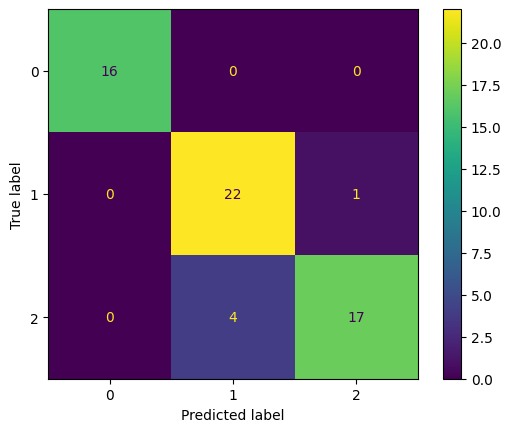

In [5]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
print (cm)
disp = ConfusionMatrixDisplay(cm,display_labels=oneNN.classes_).plot()

Outras Métricas - Micro, Macro, Weighted 

In [6]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score

print("accuracy score: %.2f\n" % accuracy_score(y_pred, y_test))
print("balanced accuracy score: %.2f\n" % balanced_accuracy_score(y_pred, y_test))

print("precision score")
print("macro: %.2f" % precision_score(y_pred, y_test, average='macro'))
print("micro: %.2f" % precision_score(y_pred, y_test, average='micro'))
print("weighted: %.2f\n" % precision_score(y_pred, y_test, average='weighted'))

print("recall score")
print("macro: %.2f" % recall_score(y_pred, y_test, average='macro'))
print("micro: %.2f" % recall_score(y_pred, y_test, average='micro'))
print("weighted: %.2f\n" % recall_score(y_pred, y_test, average='weighted'))

print("fmeasure score")
print("macro: %.2f" % f1_score(y_pred, y_test, average='macro'))
print("micro: %.2f" % f1_score(y_pred, y_test, average='micro'))
print("weighted: %.2f\n" % f1_score(y_pred, y_test, average='weighted'))

accuracy score: 0.92

balanced accuracy score: 0.93

precision score
macro: 0.92
micro: 0.92
weighted: 0.92

recall score
macro: 0.93
micro: 0.92
weighted: 0.92

fmeasure score
macro: 0.92
micro: 0.92
weighted: 0.92



Medidas de Avaliação

In [7]:
y_pred = [0]*50 + [1, 2]*5

print (confusion_matrix(y_test, y_pred), '\n')

print("accuracy score: %.2f\n" % accuracy_score(y_pred, y_test))
print("balanced accuracy score: %.2f\n" % balanced_accuracy_score(y_pred, y_test))

print("precision score")
print("macro: %.2f" % precision_score(y_pred, y_test, average='macro'))
print("micro: %.2f" % precision_score(y_pred, y_test, average='micro'))
print("weighted: %.2f\n" % precision_score(y_pred, y_test, average='weighted'))

print("recall score")
print("macro: %.2f" % recall_score(y_pred, y_test, average='macro'))
print("micro: %.2f" % recall_score(y_pred, y_test, average='micro'))
print("weighted: %.2f\n" % recall_score(y_pred, y_test, average='weighted'))

print("fmeasure score")
print("macro: %.2f" % f1_score(y_pred, y_test, average='macro'))
print("micro: %.2f" % f1_score(y_pred, y_test, average='micro'))
print("weighted: %.2f\n" % f1_score(y_pred, y_test, average='weighted'))

[[16  0  0]
 [19  3  1]
 [15  2  4]] 

accuracy score: 0.38

balanced accuracy score: 0.57

precision score
macro: 0.44
micro: 0.38
weighted: 0.86

recall score
macro: 0.57
micro: 0.38
weighted: 0.38

fmeasure score
macro: 0.34
micro: 0.38
weighted: 0.45



Métodos de Amostragem

Resubstituição

[[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]


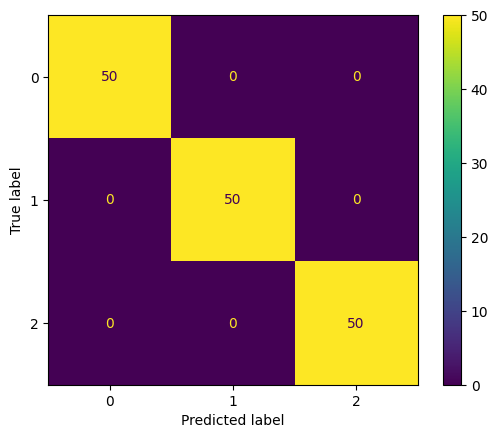

In [8]:
oneNN = KNeighborsClassifier(n_neighbors=1)
oneNN.fit(iris_X, iris_y) 
y_test = iris_y
y_pred = oneNN.predict(iris_X)
cm = confusion_matrix(y_test, y_pred)
print (cm)
disp = ConfusionMatrixDisplay(cm).plot()

Divisão Percentual

[[21  0  0]
 [ 0 28  2]
 [ 0  5 19]]


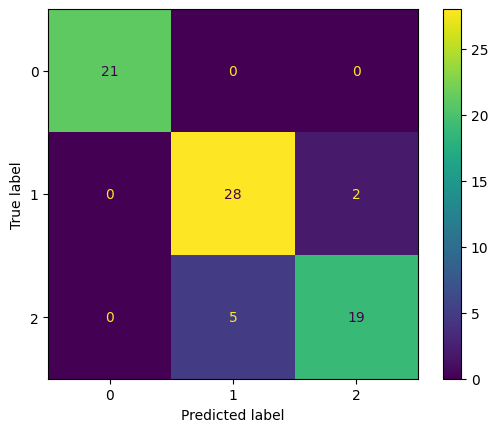

In [9]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, 
                    iris.target, test_size=0.5, random_state=0)
oneNN.fit(X_train, y_train) 
y_pred = oneNN.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print (cm)
disp = ConfusionMatrixDisplay(cm).plot()

Validação Cruzada

fold accuracy: [0.96666667 0.96666667 0.93333333 0.93333333 1.        ]

Mean Accuracy: 0.96 Standard Deviation: 0.02
Accuracy Confidence Interval (95%): (0.94, 0.98)

[[50  0  0]
 [ 0 47  3]
 [ 0  3 47]]


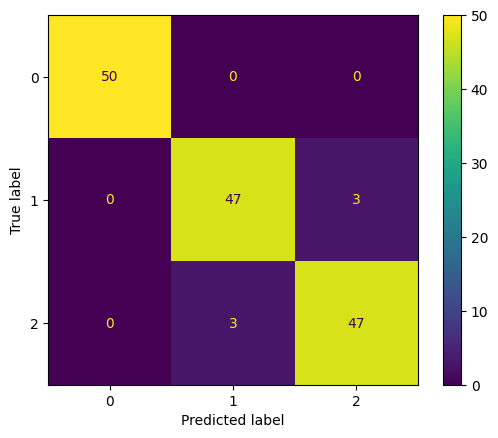

In [10]:
from sklearn.model_selection import cross_val_score
from scipy import stats

oneNN = KNeighborsClassifier(n_neighbors=1)
scores = cross_val_score(oneNN, iris_X, iris_y, cv=5)

print('fold accuracy:', scores)

mean = scores.mean()
std = scores.std()
inf, sup = stats.norm.interval(0.95, loc=mean, 
                               scale=std/np.sqrt(len(scores)))

print("\nMean Accuracy: %0.2f Standard Deviation: %0.2f" % (mean, std))
print ("Accuracy Confidence Interval (95%%): (%0.2f, %0.2f)\n" % 
       (inf, sup))    

from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(oneNN, iris_X, iris_y, cv=5)
conf_mat = confusion_matrix(iris_y, y_pred)

print(conf_mat)

disp = ConfusionMatrixDisplay(conf_mat).plot()


Validação Cruzada com Várias Métricas

In [11]:
from sklearn.model_selection import cross_validate
scorings = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
scores = cross_validate(oneNN, iris_X, iris_y, 
                        scoring=scorings, cv=5)

scores_acc = scores['test_accuracy']
print("Mean Accuracy: %0.2f Standard Deviation: %0.2f" % 
      (scores_acc.mean(),scores_acc.std()))

scores_prec = scores['test_precision_macro']
print("Mean Macro Precision: %0.2f Standard Deviation: %0.2f" % 
      (scores_prec.mean(),scores_prec.std()))

scores_rec = scores['test_recall_macro']
print("Mean Macro Recall: %0.2f Standard Deviation: %0.2f" % 
      (scores_rec.mean(),scores_rec.std()))

scores_f1 = scores['test_f1_macro']
print("Mean Macro F1: %0.2f Standard Deviation: %0.2f" % 
      (scores_f1.mean(),scores_f1.std()))

Mean Accuracy: 0.96 Standard Deviation: 0.02
Mean Macro Precision: 0.96 Standard Deviation: 0.02
Mean Macro Recall: 0.96 Standard Deviation: 0.02
Mean Macro F1: 0.96 Standard Deviation: 0.03


Um Excluído

In [12]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()
scores = cross_val_score(oneNN, iris_X, iris_y, cv=loo)

print(scores)

mean = scores.mean()
std = scores.std()
inf, sup = stats.norm.interval(0.95, loc=mean, 
                               scale=std/np.sqrt(len(scores)))

print("\nMean Accuracy: %0.2f Standard Deviation: %0.2f" % (mean, std))
print ("Accuracy Confidence Interval (95%%): (%0.2f, %0.2f)\n" % 
       (inf, sup))    


[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]

Mean Accuracy: 0.96 Standard Deviation: 0.20
Accuracy Confidence Interval (95%): (0.93, 0.99)



Busca em Grade

In [13]:
from sklearn.model_selection import GridSearchCV

kNN = KNeighborsClassifier()

grade = {'n_neighbors': [1, 3, 5]}

gs = GridSearchCV(estimator=kNN, param_grid = grade, 
                  scoring='accuracy', cv = 10)

gs = gs.fit(iris_X, iris_y)

print("Best Mean Accuracy: %0.2f" % gs.best_score_)
print("Best Parameter Values: ", gs.best_params_)
print("Grid Search Result Infos: ", gs.cv_results_.keys())

print(gs.cv_results_['split1_test_score'][0])
print(gs.cv_results_['split7_test_score'])

parciais1 = np.array ([gs.cv_results_['split0_test_score'][0], 
                       gs.cv_results_['split1_test_score'][0], 
                       gs.cv_results_['split2_test_score'][0], 
                       gs.cv_results_['split3_test_score'][0], 
                       gs.cv_results_['split4_test_score'][0], 
                       gs.cv_results_['split5_test_score'][0], 
                       gs.cv_results_['split6_test_score'][0], 
                       gs.cv_results_['split7_test_score'][0], 
                       gs.cv_results_['split8_test_score'][0], 
                       gs.cv_results_['split9_test_score'][0]])

parciais2 = np.array ([gs.cv_results_['split0_test_score'][1], 
                       gs.cv_results_['split1_test_score'][1], 
                       gs.cv_results_['split2_test_score'][1], 
                       gs.cv_results_['split3_test_score'][1], 
                       gs.cv_results_['split4_test_score'][1], 
                       gs.cv_results_['split5_test_score'][1], 
                       gs.cv_results_['split6_test_score'][1], 
                       gs.cv_results_['split7_test_score'][1], 
                       gs.cv_results_['split8_test_score'][1], 
                       gs.cv_results_['split9_test_score'][1]])

parciais3 = np.array ([gs.cv_results_['split0_test_score'][2], 
                       gs.cv_results_['split1_test_score'][2], 
                       gs.cv_results_['split2_test_score'][2], 
                       gs.cv_results_['split3_test_score'][2], 
                       gs.cv_results_['split4_test_score'][2], 
                       gs.cv_results_['split5_test_score'][2], 
                       gs.cv_results_['split6_test_score'][2], 
                       gs.cv_results_['split7_test_score'][2], 
                       gs.cv_results_['split8_test_score'][2], 
                       gs.cv_results_['split9_test_score'][2]]) 

print (parciais1)
print (parciais2)
print (parciais3)

print (parciais1.mean())
print (parciais2.mean())
print (parciais3.mean())

Best Mean Accuracy: 0.97
Best Parameter Values:  {'n_neighbors': 5}
Grid Search Result Infos:  dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_n_neighbors', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])
0.9333333333333333
[1. 1. 1.]
[1.         0.93333333 1.         0.93333333 0.86666667 1.
 0.86666667 1.         1.         1.        ]
[1.         0.93333333 1.         0.93333333 0.86666667 1.
 0.93333333 1.         1.         1.        ]
[1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]
0.96
0.9666666666666666
0.9666666666666668


Validação Cruzada Aninhada Repetida

In [14]:
from sklearn.model_selection import RepeatedStratifiedKFold

grade = {'n_neighbors': [1, 3, 5]}

gs = GridSearchCV(estimator=kNN, param_grid = grade, 
                  scoring='accuracy', cv = 4)

rkf = RepeatedStratifiedKFold(n_splits=5, n_repeats=6)
scores = cross_val_score(gs, iris_X, iris_y, scoring='accuracy', 
                         cv = rkf)

print (scores)

mean = scores.mean()
std = scores.std()
inf, sup = stats.norm.interval(0.95, loc=mean, 
                               scale=std/np.sqrt(len(scores)))

print("\nMean Accuracy: %0.2f Standard Deviation: %0.2f" % (mean, std))
print ("Accuracy Confidence Interval (95%%): (%0.2f, %0.2f)\n" % 
       (inf, sup))

[0.96666667 0.96666667 0.9        0.96666667 0.96666667 0.93333333
 0.93333333 0.96666667 1.         0.96666667 1.         0.9
 1.         0.86666667 1.         1.         0.96666667 0.93333333
 0.96666667 0.86666667 0.96666667 0.96666667 1.         0.96666667
 0.96666667 0.96666667 0.93333333 1.         0.96666667 0.96666667]

Mean Accuracy: 0.96 Standard Deviation: 0.04
Accuracy Confidence Interval (95%): (0.95, 0.97)



In [15]:
from sklearn.tree import DecisionTreeClassifier

dT = DecisionTreeClassifier()

dTGrade = {'max_depth': [2, 3], 'min_samples_split': [2, 4]}

dTGS = GridSearchCV(estimator=dT, param_grid = dTGrade, 
                  scoring='accuracy', cv = 4)

dTScores = cross_val_score(dTGS, iris_X, iris_y, scoring='accuracy', 
                           cv = rkf)

print (dTScores)

dTMean = dTScores.mean()
dTStd = dTScores.std()
dTInf, dTSup = stats.norm.interval(0.95, loc=mean, 
                                   scale=std/np.sqrt(len(scores)))

print("\nMean Accuracy: %0.2f Standard Deviation: %0.2f" % (dTMean, 
                                                            dTStd))
print ("Accuracy Confidence Interval (95%%): (%0.2f, %0.2f)\n" % 
       (dTInf, dTSup))

[1.         0.96666667 0.86666667 0.96666667 0.96666667 0.96666667
 0.9        0.96666667 0.93333333 0.96666667 0.96666667 0.96666667
 0.9        0.93333333 0.9        0.93333333 0.9        0.96666667
 0.93333333 0.96666667 0.93333333 1.         0.96666667 0.93333333
 0.86666667 1.         0.9        0.93333333 1.         0.96666667]

Mean Accuracy: 0.95 Standard Deviation: 0.04
Accuracy Confidence Interval (95%): (0.95, 0.97)



Testes de Hipóteses

In [16]:
from scipy.stats import ttest_rel, wilcoxon

print('Paired T Test')
s,p = ttest_rel(scores,dTScores)
print("t: %0.2f p-value: %0.2f\n" % (s,p))


print ('Wilcoxon Test')
s,p = wilcoxon (scores,dTScores, method='approx') # é necessário definir o método para evitar um warning
print("w: %0.2f p-value: %0.2f\n" % (s,p))

Paired T Test
t: 1.42 p-value: 0.17

Wilcoxon Test
w: 102.50 p-value: 0.16

